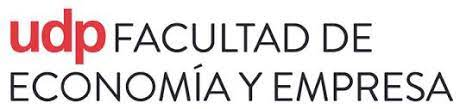


# UDP - Bussines Analytics 1

### Control 1 (15%):

# CONTROL: Caso Práctico Retail (15%, 1 de 2)

### Trabajo práctico a ser desarrollado en grupos de 3 estudiantes máx

Se tiene una base de datos de clientes que se desea analizar, para saber:

1. Que tiendas son las más rentables?
2. Que perfil de clientes explica esta rentabilidad?


La información que se tiene está contenida en las siguientes columnas y su definición:

* bird year: año de nacimiento
* store: tienda a la que asiste el cliente
* sex: sexo del cliente (1=H , 2=M)
* age: edad del cliente
* buy: variable binaria (1=S, 2=N)
* flat_C: piso de la tienda donde se produce la venta (0=hall, 1=deporte, 2=ropa, 3=calzado)
* flat_2: piso de la tienda donde se produce la venta (1=tech, 2=muebles,3=outdoor)
* nse: nivel socio economico (A, B, C)
* park: uso estacionamiento (S=si, N=no)
* re buy: probabilidad de recompra (float entre 0 y 1)
* sale (tax incl): monto de la venta (IVA incluído)
* channel: canal de venta (1=presencial, 2=internet)
* tpo_: tiempo de permanencia comprando (minutos)
* unnamed 0: sin información
* unnamed_1: sin información

### Funciones Estadísticas Clásicas
   * median
   * average
   * mean
   * std
   * var


***Link a consultar:*** https://numpy.org/doc/stable/reference/routines.statistics.html

# Resolver las siguientes preguntas

### Considere lo siguientes supuestos:
* Variable objetivo **ventas_netas**
  * Debe crear una columna con el nombre ventas_netas
  * Calcular el valor de la venta sin IVA, asuma 19%
* Errores en la data: es muy común que existan, y debe resolver situaciones tales como:
  * Datos faltantes: explique como los rellenará y el supuesto que asumirá ría(recomiendo investigar librería Pandas, función ffill y bfill)
  * Distintos tipos de datos en la misma columna: deberá corregir, reemplazar y explicar los supuestos asumidos
  * Data mal registrada: corrección en nombres o respuestas de variables



## Instalación de ambiente de trabajo

In [3]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-


# Instalación de librerías
# ! pip install missingno
# ! pip install --upgrade pip
# ! pip install sinfo

In [4]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# complementa algunas visualizaciones
%matplotlib inline
# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


# Cargamos la data disponible

In [5]:
data = pd.read_excel('retail01.xls')
data.head()

,bird year,store,sex,age,buy,flat_C,flat_2,nse,park,re buy,sale (tax incl),channel,tpo_,unnamed 0,unnamed_1
0,1983,1,2.0,40,1,3,1,B,S,0.641975,9509.0,1.0,NaN,,
1,1974,1,2.0,49,1,3,1,B,S,0.728940,32650.0,1.0,NaN,,
2,1993,2,2.0,30,1,1,1,C,0,0.711413,9898.0,1.0,11.0,,
3,1997,4,2.0,26,1,1,1,B,S,0.703295,2176.0,2.0,153.0,,
4,2007,1,2.0,16,1,1,1,A,S,0.152210,5557.0,1.0,NaN,,


# 1. Preprocesamiento de datos (3pts)

* Revisar la data y corregir de ser necesario.
* Registrar y explicar los supuestos que asuma

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bird year        1678 non-null   int64  
 1   store            1677 non-null   object 
 2   sex              1666 non-null   float64
 3   age              1678 non-null   int64  
 4   buy              1677 non-null   object 
 5   flat_C           1678 non-null   int64  
 6   flat_2           1678 non-null   int64  
 7   nse              1678 non-null   object 
 8   park             1678 non-null   object 
 9   re buy           1678 non-null   float64
 10  sale (tax incl)  1663 non-null   float64
 11  channel          1677 non-null   float64
 12  tpo_             1424 non-null   float64
 13  unnamed 0        1678 non-null   object 
 14  unnamed_1        1678 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 196.8+ KB


In [7]:
# Exploramos la columna:
data.columns

Index(['bird year', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're buy', 'sale (tax incl)', 'channel', 'tpo_', 'unnamed 0',
       'unnamed_1'],
      dtype='object')

In [8]:
# Aplicamos la función drop()
df = data.drop(['unnamed 0','unnamed_1' ], axis=1)
df.sample(10)


,bird year,store,sex,age,buy,flat_C,flat_2,nse,park,re buy,sale (tax incl),channel,tpo_
395,2005,4,2.0,18,1,1,2,C,0,0.435658,9359.0,1.0,4.0
665,1989,2,2.0,34,1,2,2,A,0,0.735015,14490.0,1.0,NaN
508,1998,1,2.0,25,1,3,3,A,0,0.527505,8464.0,2.0,57.0
228,1997,Casa Matriz,2.0,26,2,3,2,B,0,0.260644,40669.0,1.0,10.0
1677,2002,3,1.0,21,2,1,2,B,0,0.231778,368.0,1.0,20.0
1488,2013,2,2.0,10,1,1,3,C,S,0.623574,4770.0,1.0,12.0
982,1998,3,2.0,25,2,2,1,A,0,0.931500,3957.0,2.0,44.0
499,2007,4,1.0,16,2,2,1,C,0,0.123949,7610.0,2.0,75.0
370,2006,4,1.0,17,1,3,1,A,0,0.639063,2256.0,2.0,232.0
754,1987,2,1.0,36,1,3,3,A,0,0.720130,20291.0,2.0,229.0


In [9]:
df.columns

Index(['bird year', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're buy', 'sale (tax incl)', 'channel', 'tpo_'],
      dtype='object')

### Cambios de nombre de la variable

- [x] __ = __


In [10]:
# Para cambiar el nombre de una variable, se debe hacer en todas las celdas donde se usa
# df.rename(columns={'A':'a'}, inplace=True)
# inplace=True: para que se guarde el cambio en el dataframe
# {} : diccionario
# A: nombre de la columna que se quiere cambiar
# a: nuevo nombre de la columna
#df.rename(columns={'A':'a'}, inplace=True)

df.rename({'bird year':'birthyear','re buy':'re_buy', 'sale (tax incl)':'precio_final', 'tpo_':'time'}, axis='columns', inplace=True)
df.columns

Index(['birthyear', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're_buy', 'precio_final', 'channel', 'time'],
      dtype='object')

## Análisis de cada variable

In [11]:
# Variable bithyear
df.birthyear.isna().sum()

0

In [12]:
df.birthyear.describe()

count    1678.000000
mean     1993.051251
std        45.417231
min       194.000000
25%      1986.000000
50%      1994.000000
75%      2002.000000
max      2023.000000
Name: birthyear, dtype: float64

In [13]:
# Se detecta un dato atípico
df.birthyear.min()

194

In [14]:
# Se reemplaza el dato atípico por el valor 1945
df.birthyear.replace(194, 1945, inplace=True)
df.birthyear.replace(1872, 1986, inplace=True)

df.birthyear.describe()

count    1678.000000
mean     1994.162694
std        11.143253
min      1945.000000
25%      1986.000000
50%      1994.000000
75%      2002.000000
max      2023.000000
Name: birthyear, dtype: float64

In [15]:
# Variable: store
df.store.value_counts()
# df.store.isna().sum()
# df.store.isnull().sum()

2              296
4              290
3              279
Casa Matriz    273
Matriz         270
1              265
Principal        3
Matriz           1
Name: store, dtype: int64

In [16]:
# Se reemplaza el valor 1 por A, 2 por B, 3 por C, 4 por D
df.store.replace({'Casa Matriz':1, 'Matriz':1, 'Principal':1, 'Matriz ':1}, inplace=True)
df.store.value_counts()

1.0    812
2.0    296
4.0    290
3.0    279
Name: store, dtype: int64

In [17]:
# Variable: sex
df.sex.value_counts()
# df.sex.isna().sum()
# df.sex.isnull().sum()


2.0    970
1.0    696
Name: sex, dtype: int64

In [18]:
# Se cambia el valor 1 por M y 2 por F
df.sex.replace({1:'M', 2:'F'}, inplace=True)

In [19]:
# Se desea reemplazar los valores nulos por la moda de la variable sex
df.sex.replace({np.nan:'F'}, inplace=True)


In [20]:
df.sex.astype('category')
df.sample(10)

,birthyear,store,sex,age,buy,flat_C,flat_2,nse,park,re_buy,precio_final,channel,time
1303,2007,4.0,M,16,2,2,2,C,0,0.266161,1308.0,1.0,5.0
1390,2002,2.0,M,21,1,3,3,A,0,0.662131,37927.0,1.0,NaN
1055,2011,1.0,M,12,1,2,2,A,0,0.294612,3391.0,2.0,63.0
1608,1983,1.0,M,40,1,2,2,C,0,0.296389,36350.0,2.0,103.0
312,1999,1.0,M,24,1,6,2,A,0,0.630996,14924.0,2.0,125.0
392,1999,2.0,F,24,2,2,1,A,0,0.407137,9109.0,2.0,180.0
1116,2013,4.0,F,10,1,2,2,C,0,0.750903,20389.0,2.0,115.0
66,1998,4.0,M,25,1,2,2,A,0,0.418477,4796.0,2.0,86.0
716,2009,1.0,F,14,2,1,1,C,S,0.927293,47279.0,1.0,6.0
201,1989,4.0,F,34,1,2,3,C,S,0.316027,31817.0,2.0,229.0


In [21]:
# Variable: age
df.age.describe()

count    1678.000000
mean       29.948749
std        45.417231
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max      1829.000000
Name: age, dtype: float64

In [22]:
# Se debe recalcular la edad
df['age2'] = 2023 - df.birthyear
df.age2.describe()

count    1678.000000
mean       28.837306
std        11.143253
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [23]:
df.age2.replace({np.nan:df.age2.mean()}, inplace=True)
df.age2.describe()

count    1678.000000
mean       28.837306
std        11.143253
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [24]:
# Se debe contar la cantidad de valores menores a 21
df[df.age2 < 21].age2.count()

400

In [25]:
# Reemplazan los valores menor a 21 por la media
for i in df[df.age2 < 21].index:
    df.age2[i] = df.age2.mean()

df.age2.describe()

count    1678.000000
mean       32.757871
std         7.399440
min        21.000000
25%        28.000000
50%        31.136249
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [26]:
# df.buy.info()
# df.buy.isna().sum()
df.buy.isnull().sum()

1

In [27]:
# Usando la librería pandas ffill() se reemplaza el valor nulo por el valor anterior
df.buy.ffill(inplace=True)
df.buy.isnull().sum()

0

In [28]:
# Variable: flat_C
#df.flat_C.isnull().sum()
# df.flat_C.isna().sum()
df.flat_C.value_counts()

3    618
2    594
1    354
6     74
0     38
Name: flat_C, dtype: int64

In [29]:
# Se reemplaza el valor 0 por 1
df.flat_C.replace({0:1}, inplace=True)
df.flat_C.value_counts()


3    618
2    594
1    392
6     74
Name: flat_C, dtype: int64

In [30]:
# Variable: flat_2
#df.flat_2.isnull().sum()
# df.flat_2.isna().sum()
df.flat_C.value_counts()

# Sin datos faltantes

3    618
2    594
1    392
6     74
Name: flat_C, dtype: int64

In [31]:
# Variable: nse
df.nse.value_counts()

B     572
A     560
C     542
a       2
a       1
aa      1
Name: nse, dtype: int64

In [32]:
# Se reemplaza el valor a y aa, por A
df.nse.replace({'a':'A', 'aa':'A', 'a ':'A'}, inplace=True)
df.nse.value_counts()

B    572
A    564
C    542
Name: nse, dtype: int64

In [33]:
# df.park.isna().sum()
# df.park.isnull().sum()
df.park.value_counts()

S    854
0    824
Name: park, dtype: int64

In [34]:
df.park.replace({'S':1}, inplace=True)
df.park.value_counts()

1    854
0    824
Name: park, dtype: int64

In [35]:
# Variable: re_buy
# df.re_buy.isna().sum()
# df.re_buy.isnull().sum()
df.re_buy.value_counts()

# No hay datos faltantes

0.641975    1
0.304931    1
0.140739    1
0.490450    1
0.146443    1
           ..
0.165393    1
0.633601    1
0.441998    1
0.027187    1
0.231778    1
Name: re_buy, Length: 1678, dtype: int64

In [36]:
# Variable: precio_final
# df.precio_final.isna().sum()
df.precio_final.isnull().sum()
# df.precio_final.describe()


15

In [37]:
# Se reemplazan los valores nulos por el dato anterior usando la librería pandas bfill()
df.precio_final.bfill(inplace=True)
df.precio_final.describe()

count     1678.000000
mean     22662.039928
std      19723.269588
min         18.000000
25%       6221.000000
50%      16891.500000
75%      33973.750000
max      86606.000000
Name: precio_final, dtype: float64

In [38]:
# Variable: channel
# df.channel.isnull().sum()
# df.channel.isna().sum()
# Se reemplaza el dato faltante por la moda
df.channel.replace({np.nan:1}, inplace=True)
df.channel.replace({'3':1}, inplace=True)

df.channel.describe()

count    1678.000000
mean        1.437426
std         0.496217
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: channel, dtype: float64

In [39]:
# Variable: time
# df.time.isnull().sum()
# df.time.isna().sum()
df.time.describe()

count    1424.000000
mean       80.023876
std        75.644363
min         1.000000
25%        15.000000
50%        48.000000
75%       143.250000
max       304.000000
Name: time, dtype: float64

In [40]:
# Se reemplaza el dato faltante por la media
df.time.replace({np.nan:df.time.mean()}, inplace=True)
df.time.describe()

count    1678.000000
mean       80.023876
std        69.680698
min         1.000000
25%        19.000000
50%        80.011938
75%       124.000000
max       304.000000
Name: time, dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   birthyear     1678 non-null   int64  
 1   store         1677 non-null   float64
 2   sex           1678 non-null   object 
 3   age           1678 non-null   int64  
 4   buy           1678 non-null   object 
 5   flat_C        1678 non-null   int64  
 6   flat_2        1678 non-null   int64  
 7   nse           1678 non-null   object 
 8   park          1678 non-null   int64  
 9   re_buy        1678 non-null   float64
 10  precio_final  1678 non-null   float64
 11  channel       1678 non-null   float64
 12  time          1678 non-null   float64
 13  age2          1678 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 183.7+ KB


In [42]:
# ! pip install --upgrade missingno

In [43]:
# # Se visualiza la matriz de datos faltantes
# import missingno as msno
# # La librería missingno no permite visualizar los nombres de las variables
# msno.matrix(df, figsize=(10,5))

# 2. Análisis Exploratorio de datos (2ptos)

* Analice de forma descriptiva los datos estudiados
  * Promedio, DS, Coef. Asimetría, Curtosis
  * Otras
* Utilice las librerías aprendidas en clase para calcular la estadística descriptiva
* Use gráficos para explicar su reporte.

# 3. Respuesta a las preguntas planteadas (2ptos)
* Hallazgos
* Conclusiones